In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns

## Load the datasets

In [2]:
df_test = pd.read_csv('''C:/Users/lucas/Documents/lucastiagooliveira/Kaggle/Titanic - Machine Learning disaster/Datasets/test.csv''')
df_train = pd.read_csv('''C:/Users/lucas/Documents/lucastiagooliveira/Kaggle/Titanic - Machine Learning disaster/Datasets/train.csv''')
# result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
# df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
# df_train.head()

## Binary encoding for sex

In [3]:
#Binary Encoding for sex -> male = 1, female = 0
df_test.Sex = df_test.Sex.map({'male': 1, 'female': 0})
#Binary Encoding for sex -> male = 1, female = 0
df_train.Sex = df_train.Sex.map({'male': 1, 'female': 0})

## Train dataframe describe

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.loc[df_train.Fare.isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
df_train.loc[df_train.Age.isna() == True].shape

(177, 12)

## Looking for correlation between variable

In [7]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


## Visualization of the data

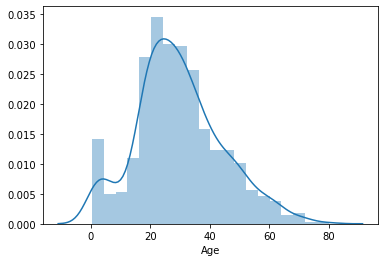

In [8]:
sns.distplot(df_train['Age'])

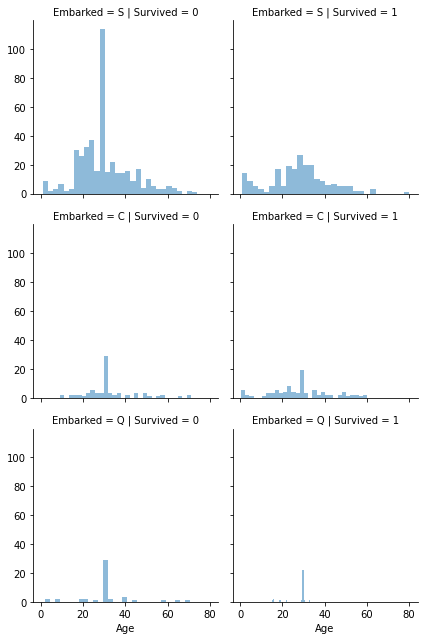

In [45]:
gid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived')
gid.map(plt.hist, 'Age', alpha = .5, bins = 30)

In [9]:
df_train.loc[df_train.Age.isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S


In [10]:
from sklearn.impute import SimpleImputer
age = np.asarray(df_train.Age).reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

age = imp.fit(age).transform(age)
df_train.drop(columns = 'Age', inplace = True)
df_train['Age'] = age

In [11]:
df_test.loc[df_test.Age.isna() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",1,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",1,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",0,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",0,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [12]:
from sklearn.impute import SimpleImputer
age = np.asarray(df_test.Age).reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='median')

age = imp.fit(age).transform(age)
df_test.drop(columns = 'Age', inplace = True)
df_test['Age'] = age

In [13]:
fare_means = df_test[['Pclass','Fare']].groupby(by = "Pclass").mean()
fare_means

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [14]:
fare = np.asarray([j if j != np.nan else fare_means[d_test.Pclass.iloc[i]-1] for i, j in enumerate(df_test.Fare)])
fare[152] = 12.459678

In [15]:
df_test.drop(columns = 'Fare', inplace = True)
df_test['Fare'] = fare
df_test.Fare[152]

12.459678

In [48]:
df_train.loc[df_train.Embarked.isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
61,62,1,1,"Icard, Miss. Amelie",0,0,0,113572,80.0,B28,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,0,0,113572,80.0,B28,NaN,62.0


In [58]:
df_train['Embarked'] = df_train['Embarked'].dropna(inplace = True, axis = 0)

In [59]:
for i in df_train:
    df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

## Changing the type of X and Y to the model

In [17]:
X = np.asarray(df_train[['Pclass','Sex','SibSp']])
y = np.asarray(df_train[['Survived']])
y.shape, X.shape

((891, 1), (891, 3))

## Standardize features

In [18]:
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.82737724,  0.73769513,  0.43279337],
       [-1.56610693, -1.35557354,  0.43279337],
       [ 0.82737724, -1.35557354, -0.4745452 ],
       ...,
       [ 0.82737724, -1.35557354,  0.43279337],
       [-1.56610693,  0.73769513, -0.4745452 ],
       [ 0.82737724,  0.73769513, -0.4745452 ]])

## Preprocessing the test data

In [19]:
x_test = np.asarray(df_test[['Pclass','Sex','Fare']])
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)

## Split the test and train data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = np.random)

## Using logistic regression 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

LR = LogisticRegression(C=0.1, solver = 'newton-cg', random_state = np.random, max_iter = 1e3).fit(X_train,y_train)
LR

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=<module 'numpy.random' from 'C:\\Users\\lucas\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

## Predict the result for test dataset

In [22]:
yhat_log = LR.predict(X_test)

In [23]:
print(classification_report(yhat_log, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       181
           1       0.69      0.75      0.72        87

    accuracy                           0.81       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

ctf = DecisionTreeClassifier(random_state = np.random, max_depth = 7, criterion = 'gini').fit(X_train,y_train)
ctf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=<module 'numpy.random' from 'C:\\Users\\lucas\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
                       splitter='best')

In [25]:
yhat_ctf = ctf.predict(X_test)

In [26]:
print(classification_report(yhat_ctf, y_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       197
           1       0.62      0.82      0.70        71

    accuracy                           0.82       268
   macro avg       0.77      0.82      0.79       268
weighted avg       0.84      0.82      0.82       268



## Support Vector Machines

In [27]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = np.random, max_iter = 1e4, tol = 1e-10).fit(X_train, y_train)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
yhat_svc = svc.predict(X_test)

In [29]:
print(classification_report(yhat_svc, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       181
           1       0.69      0.75      0.72        87

    accuracy                           0.81       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



## KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 100).fit(X_train, y_train)


C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
yhat_knc = knc.predict(X_test)

In [32]:
print(classification_report(yhat_knc, y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       176
           1       0.70      0.72      0.71        92

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



## MLPCLassifier

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 1000, tol = 1e-30, learning_rate = 'adaptive', alpha = 1e-12).fit(X_train, y_train)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
yhat_mlp = svc.predict(X_test)

In [35]:
print(classification_report(yhat_mlp, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       181
           1       0.69      0.75      0.72        87

    accuracy                           0.81       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
yhat_rfc = rfc.predict(X_test)

In [38]:
print(classification_report(yhat_rfc, y_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       197
           1       0.62      0.82      0.70        71

    accuracy                           0.82       268
   macro avg       0.77      0.82      0.79       268
weighted avg       0.84      0.82      0.82       268



## The best model

In [39]:
from sklearn.tree import DecisionTreeClassifier

ctf_2 = DecisionTreeClassifier(random_state = np.random, max_depth = 8, criterion = 'gini').fit(X,y)
ctf_2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=<module 'numpy.random' from 'C:\\Users\\lucas\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
                       splitter='best')

In [40]:
yhat = svc_2.predict(x_test)

NameError: name 'svc_2' is not defined

## Making the result .csv file

In [ ]:
dict_ = {'PassengerId': df_test['PassengerId'], 'Survived': yhat }

In [ ]:
final_result = pd.DataFrame(dict_)
final_result

In [ ]:
final_result.to_csv('results.csv',index=False)